# Scenario 2: SIDARTHE model
This model is already annotated as a biomodels model (model BIOMD0000000955) and can be found here:
https://www.ebi.ac.uk/biomodels/BIOMD0000000955

In [1]:
from IPython.display import Image
from mira.sources.biomodels import get_template_model
from mira.modeling import Model
from mira.modeling.petri import PetriNetModel
from mira.metamodel import model_to_json_file

# Get the model
sidarthe = get_template_model('BIOMD0000000955')

### Simplify model to break up group control

In [2]:
from mira.metamodel.ops import simplify_rate_laws
sidarthe = simplify_rate_laws(sidarthe)
sidarthe.draw_graph('sidarthe.png')

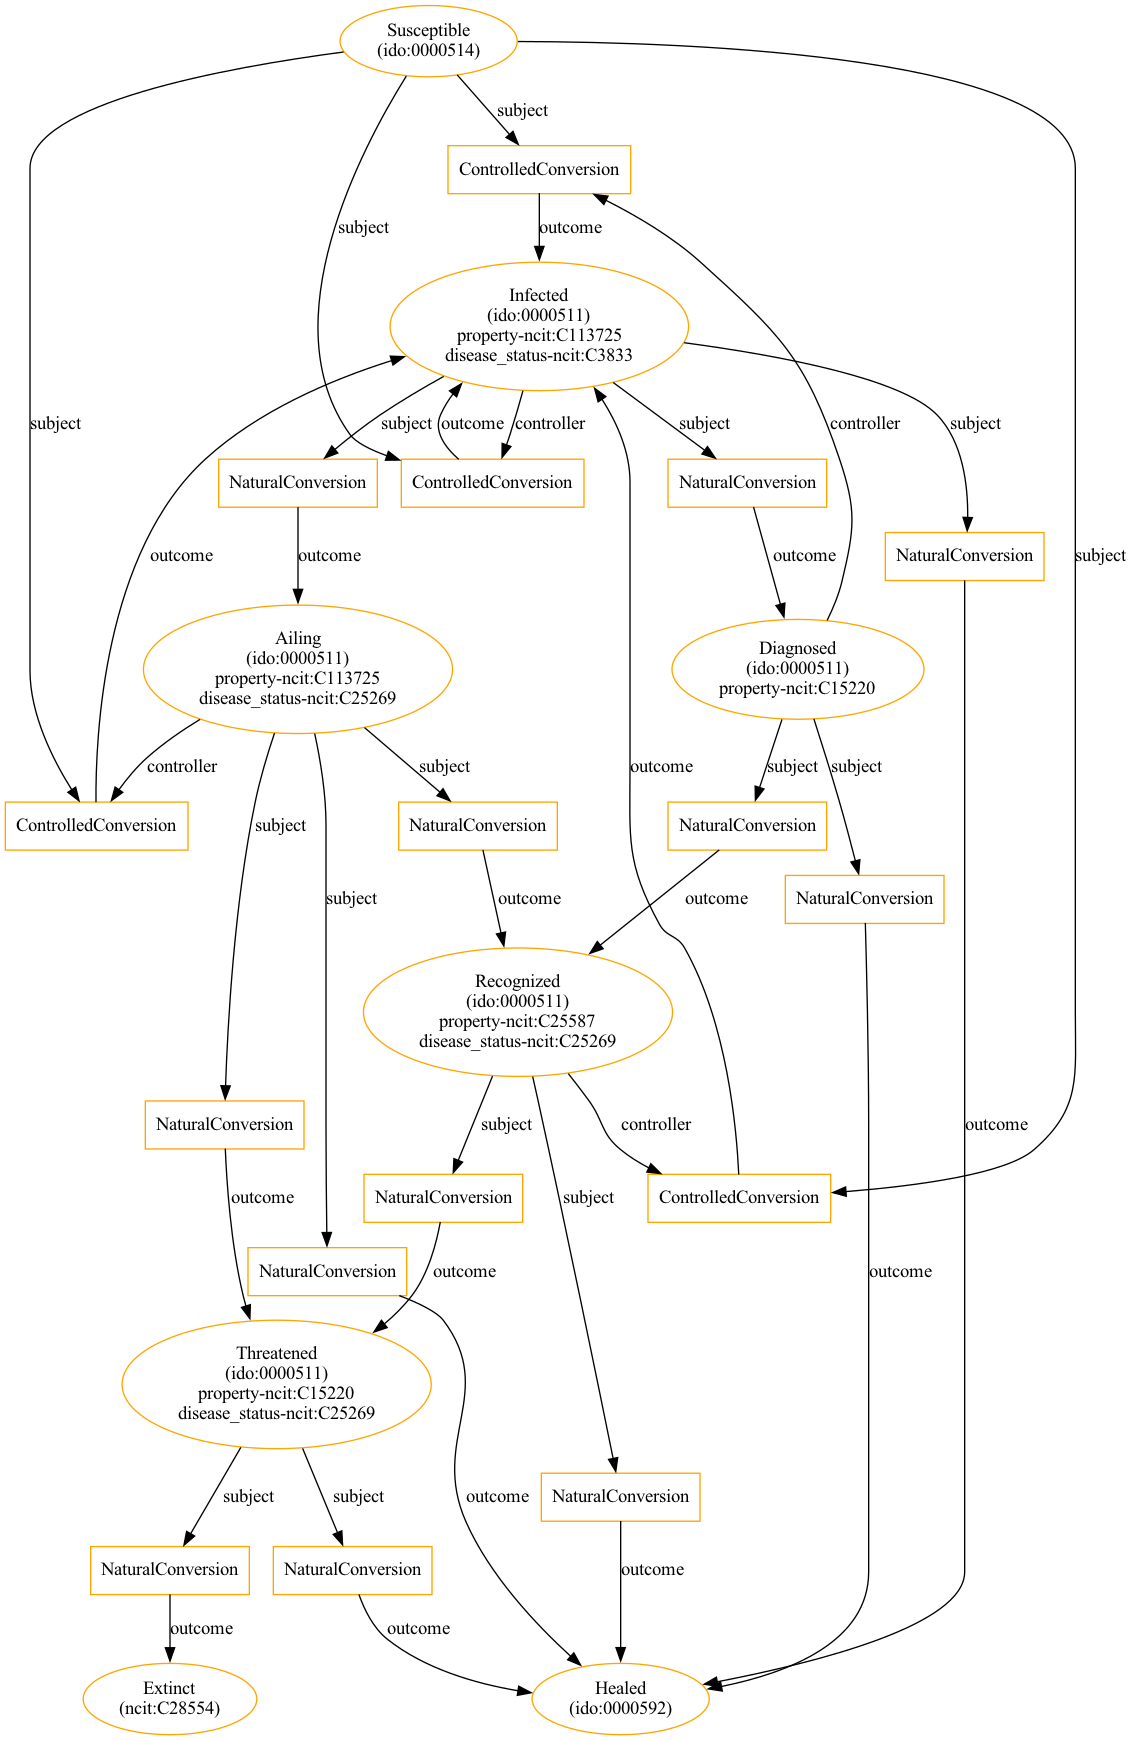

In [3]:
assert sidarthe is not None
Image('sidarthe.png')

In [4]:
pm = PetriNetModel(Model(sidarthe))
pm.to_json_file('scenario2_sidarthe.json', indent=1)

In [5]:
model_to_json_file(sidarthe, 'scenario2_sidarthe_mira.json')

In [6]:
sidarthe.templates[1]

ControlledConversion(rate_law=Ailing*Susceptible*gamma, type='ControlledConversion', controller=Concept(name='Ailing', identifiers={'ido': '0000511'}, context={'property': 'ncit:C113725', 'disease_status': 'ncit:C25269'}), subject=Concept(name='Susceptible', identifiers={'ido': '0000514'}, context={}), outcome=Concept(name='Infected', identifiers={'ido': '0000511'}, context={'property': 'ncit:C113725', 'disease_status': 'ncit:C3833'}), provenance=[])

In [7]:
sidarthe.parameters

{'alpha': Parameter(name='alpha', identifiers={}, context={}, value=0.57),
 'beta': Parameter(name='beta', identifiers={}, context={}, value=0.011),
 'gamma': Parameter(name='gamma', identifiers={}, context={}, value=0.456),
 'delta': Parameter(name='delta', identifiers={}, context={}, value=0.011),
 'epsilon': Parameter(name='epsilon', identifiers={}, context={}, value=0.171),
 'theta': Parameter(name='theta', identifiers={}, context={}, value=0.371),
 'zeta': Parameter(name='zeta', identifiers={}, context={}, value=0.125),
 'eta': Parameter(name='eta', identifiers={}, context={}, value=0.125),
 'mu': Parameter(name='mu', identifiers={}, context={}, value=0.017),
 'nu': Parameter(name='nu', identifiers={}, context={}, value=0.027),
 'tau': Parameter(name='tau', identifiers={}, context={}, value=0.01),
 'kappa': Parameter(name='kappa', identifiers={}, context={}, value=0.017),
 'rho': Parameter(name='rho', identifiers={}, context={}, value=0.034),
 'sigma': Parameter(name='sigma', iden

## Add vaccination
According to the scenario description, vaccination is added to the model and is described in this Nature paper: [https://www.nature.com/articles/s41591-021-01334-5](https://www.nature.com/articles/s41591-021-01334-5), see the graphics of the model here: [https://www.nature.com/articles/s41591-021-01334-5/figures/1](https://www.nature.com/articles/s41591-021-01334-5/figures/1)
The vaccination is added as immunizing vaccination, meaning when someone is vaccinated in this model, they are converted to an end-state in the model.

{'alpha': Parameter(name='alpha', identifiers={}, context={}, value=0.57), 'beta': Parameter(name='beta', identifiers={}, context={}, value=0.011), 'gamma': Parameter(name='gamma', identifiers={}, context={}, value=0.456), 'delta': Parameter(name='delta', identifiers={}, context={}, value=0.011), 'epsilon': Parameter(name='epsilon', identifiers={}, context={}, value=0.171), 'theta': Parameter(name='theta', identifiers={}, context={}, value=0.371), 'zeta': Parameter(name='zeta', identifiers={}, context={}, value=0.125), 'eta': Parameter(name='eta', identifiers={}, context={}, value=0.125), 'mu': Parameter(name='mu', identifiers={}, context={}, value=0.017), 'nu': Parameter(name='nu', identifiers={}, context={}, value=0.027), 'tau': Parameter(name='tau', identifiers={}, context={}, value=0.01), 'kappa': Parameter(name='kappa', identifiers={}, context={}, value=0.017), 'rho': Parameter(name='rho', identifiers={}, context={}, value=0.034), 'sigma': Parameter(name='sigma', identifiers={}, c

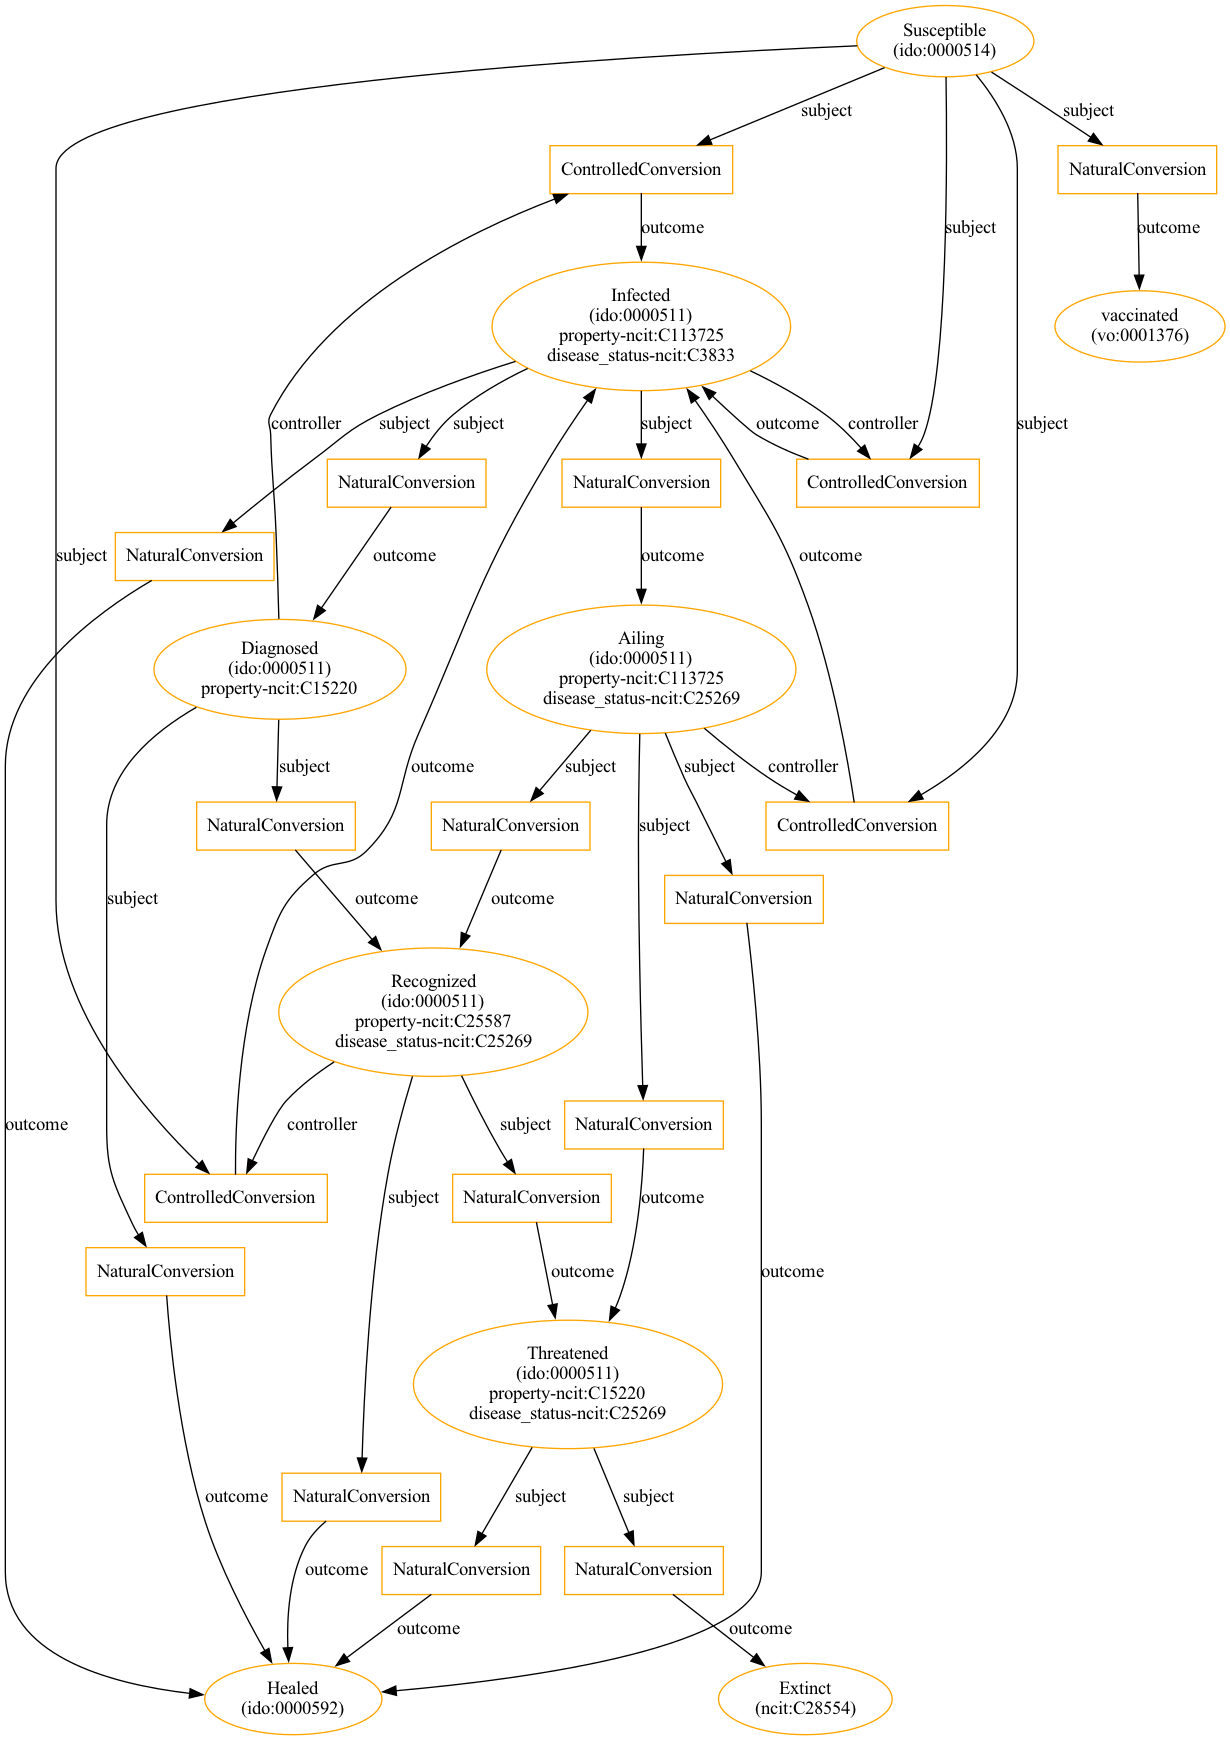

In [8]:
import sympy
from mira.metamodel import NaturalConversion, GroupedControlledConversion, ControlledConversion, Parameter
from mira.examples.concepts import vaccinated

# Extend the model with vaccination, first pick out the susceptible Concept that already exists in the model
susceptible = None
for template in sidarthe.templates:
    if isinstance(template, ControlledConversion):
        susceptible = template.subject
        if susceptible.get_curie_str() == "ido:0000514":
            break
assert susceptible is not None

vaccination = NaturalConversion(subject=susceptible, outcome=vaccinated)

# Create a new model with vaccination by adding the vaccination process to the existing model
sidarthe_v = sidarthe.add_template(vaccination)

# Add the vaccination rate law
vaccination.set_mass_action_rate_law("phi")
sidarthe_v.parameters['phi'] = Parameter(name="phi", value=1)

sidarthe_v.draw_graph('sidarthe_v.png')
Image('sidarthe_v.png')

In [9]:
# Compare the models to see the difference
from mira.dkg.web_client import is_ontological_child_web
from mira.metamodel.templates import TemplateModelDelta

assert len(sidarthe.templates) > 0

tmd = TemplateModelDelta(sidarthe, sidarthe_v, refinement_function=is_ontological_child_web)

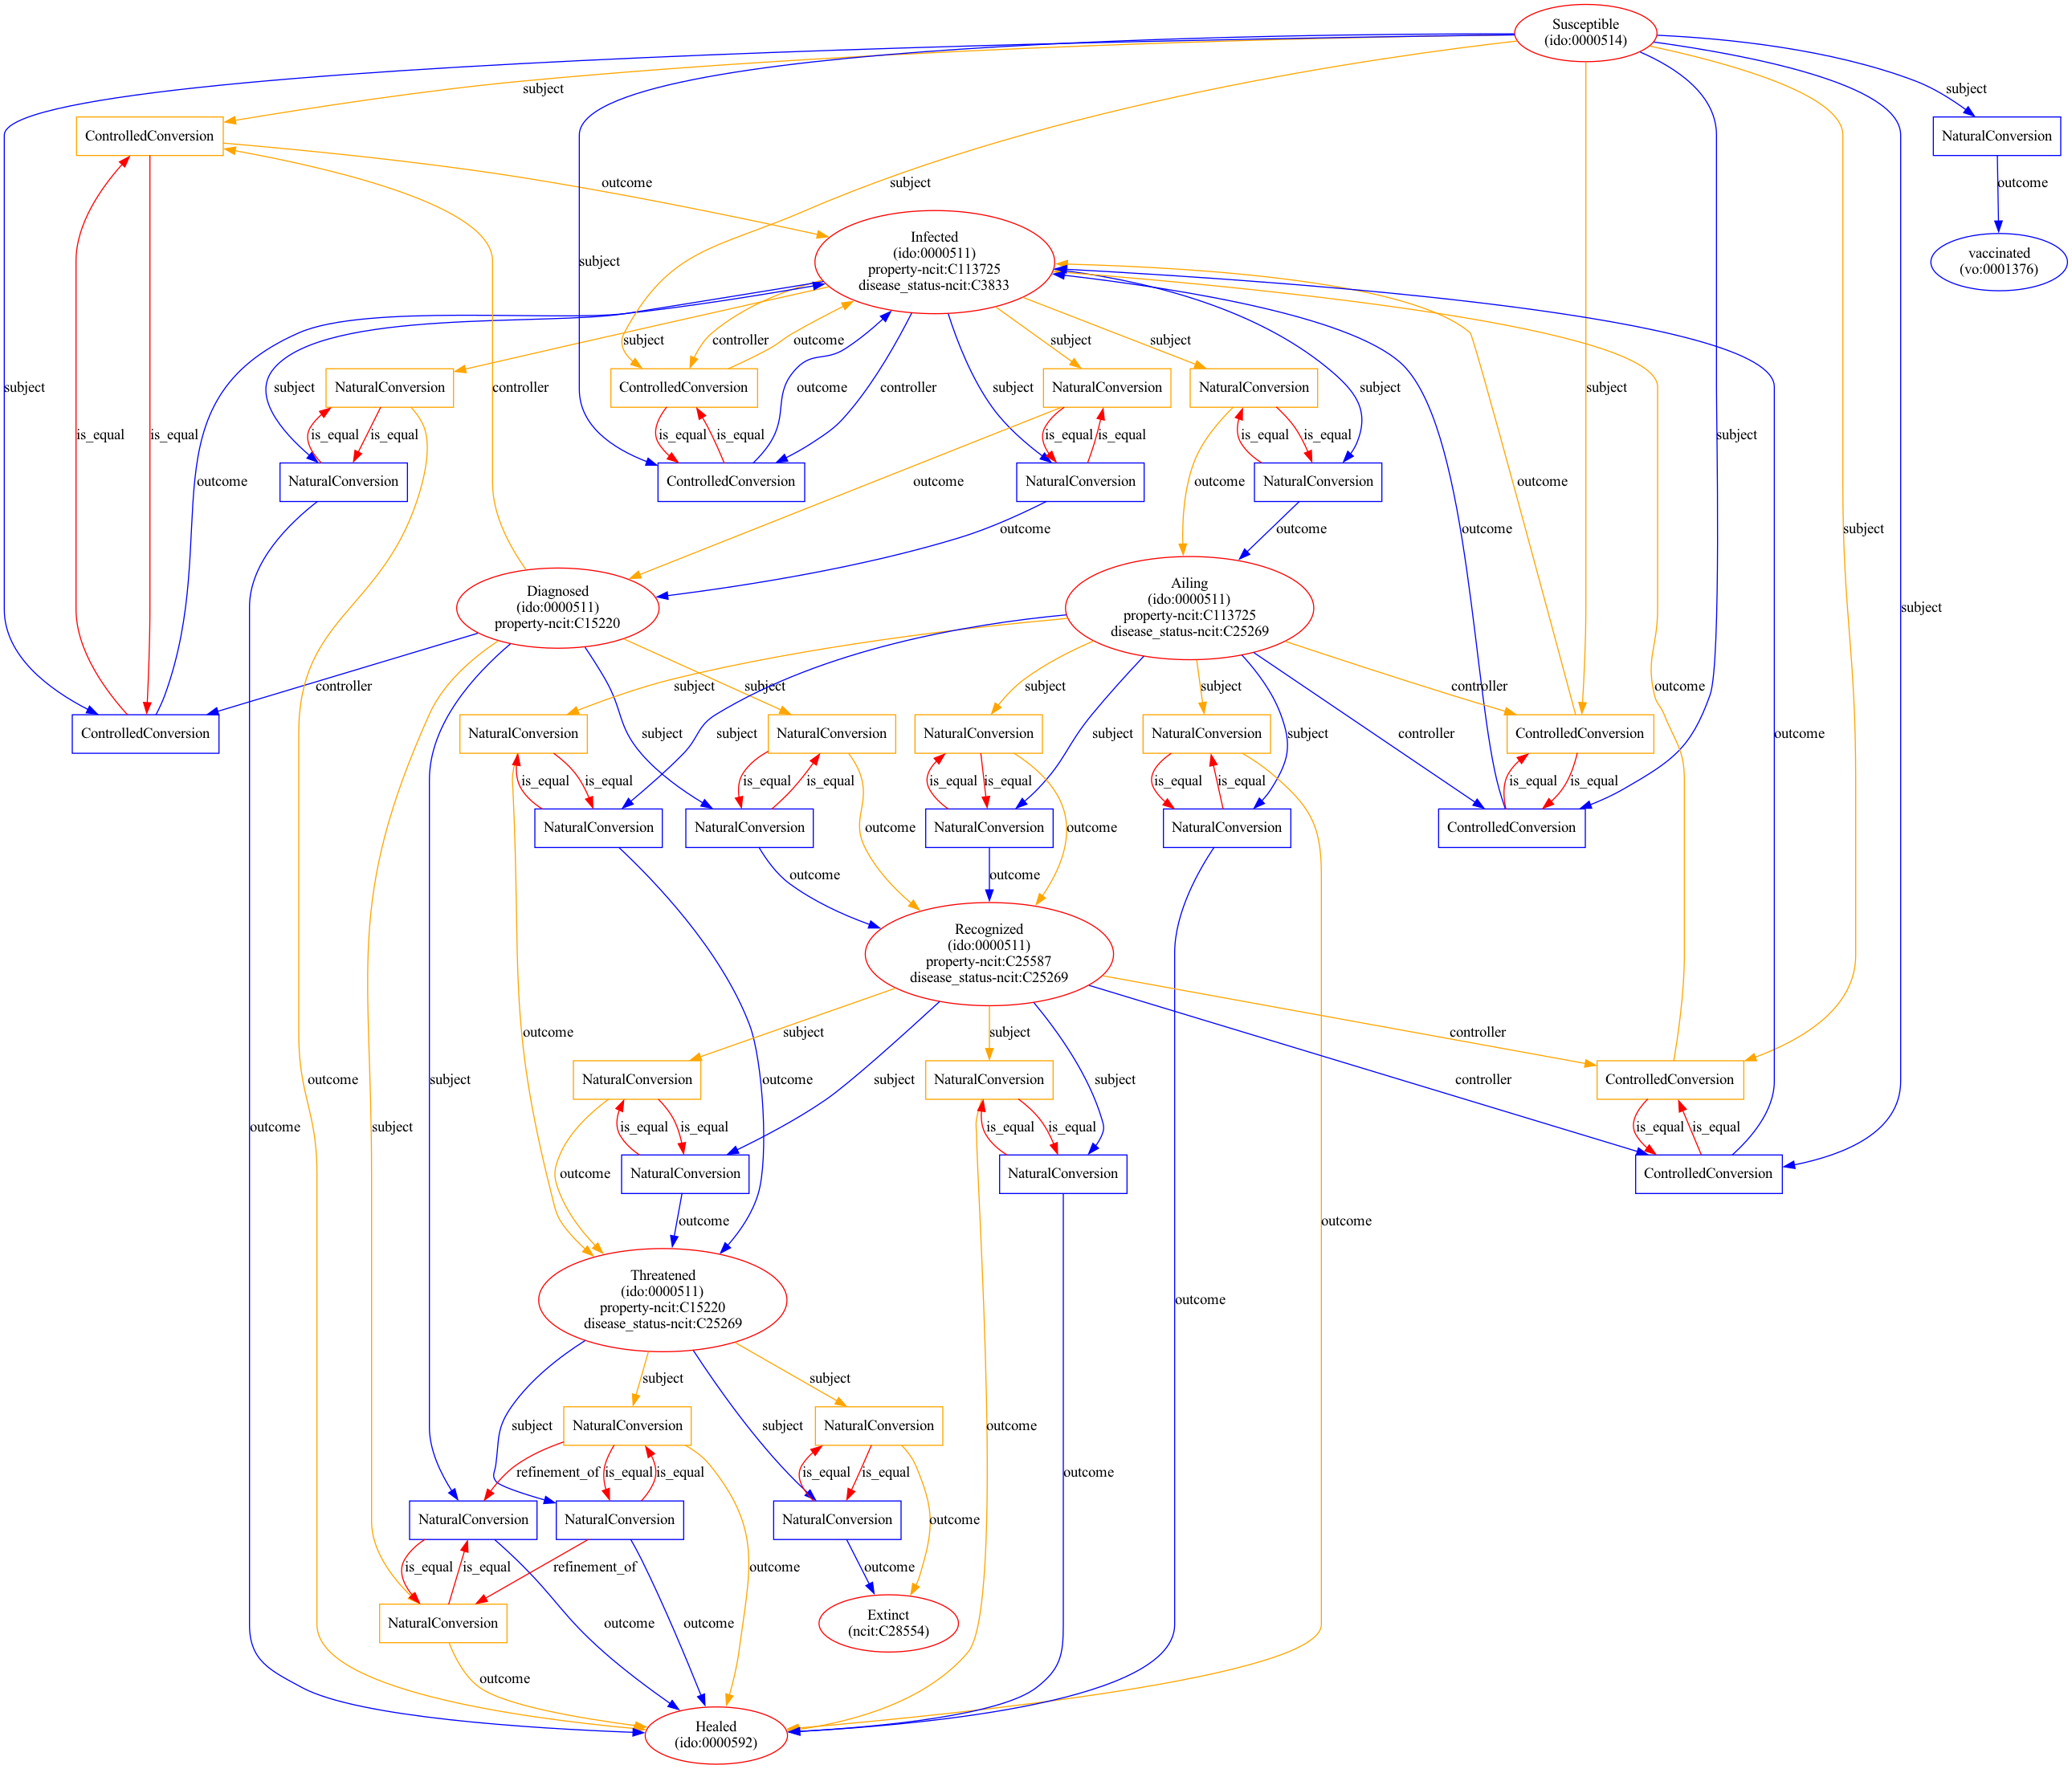

In [10]:
tmd.draw_graph("sidarthe_v_diff.png", args='-Grankdir=TB')
Image('sidarthe_v_diff.png')

In [11]:
# Export to Petrinet
sidarthe_v_petri = PetriNetModel(Model(sidarthe_v))
sidarthe_v_petri.to_json_file('scenario2_sidarthe_v.json', indent=1)

In [12]:
model_to_json_file(sidarthe_v, 'scenario2_sidarthe_v_mira.json')

In [13]:
sidarthe_v.parameters

{'alpha': Parameter(name='alpha', identifiers={}, context={}, value=0.57),
 'beta': Parameter(name='beta', identifiers={}, context={}, value=0.011),
 'gamma': Parameter(name='gamma', identifiers={}, context={}, value=0.456),
 'delta': Parameter(name='delta', identifiers={}, context={}, value=0.011),
 'epsilon': Parameter(name='epsilon', identifiers={}, context={}, value=0.171),
 'theta': Parameter(name='theta', identifiers={}, context={}, value=0.371),
 'zeta': Parameter(name='zeta', identifiers={}, context={}, value=0.125),
 'eta': Parameter(name='eta', identifiers={}, context={}, value=0.125),
 'mu': Parameter(name='mu', identifiers={}, context={}, value=0.017),
 'nu': Parameter(name='nu', identifiers={}, context={}, value=0.027),
 'tau': Parameter(name='tau', identifiers={}, context={}, value=0.01),
 'kappa': Parameter(name='kappa', identifiers={}, context={}, value=0.017),
 'rho': Parameter(name='rho', identifiers={}, context={}, value=0.034),
 'sigma': Parameter(name='sigma', iden

In [14]:
from mira.metamodel import TemplateModelComparison
tc = TemplateModelComparison([sidarthe, sidarthe_v], refinement_func=is_ontological_child_web)

In [15]:
print(tc.model_comparison.get_similarity_scores())

[{'models': (0, 1), 'score': 0.8888888888888888}]
